Name-Vipul Anand
Batch-DS2312
Assignment-Cencus Income

Problem Statement-This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

SO the problem statement is that we have to determine whether a person makes over $50 a year or not. So let us proceed further

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
data=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Census%20Income/Census%20Income.csv')

In [2]:
#The dataset
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
data.shape

(32560, 15)

#SO this dataset has 15 columns and has 32560 rows

Now let us proceed to the data analysis and the treatement of the nulls if any. We will also see the relation of each of the feaure with the label in this.

In [7]:
data.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

#SO this dataset has no null 
#Now let us do the analysis of every column with the label and we will also see the relation of each column with the label

In [12]:
#Age
data['Age'].value_counts().sort_values(ascending=False)

Age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64

In [13]:
pd.set_option('display.max_rows',None)

In [16]:
#Let us see all the rows at once so that we can get a clear idea of what is actually happening inside
data['Age'].value_counts().sort_index(ascending=True)

Age
17    395
18    550
19    712
20    753
21    720
22    765
23    877
24    798
25    841
26    785
27    835
28    867
29    813
30    861
31    888
32    828
33    875
34    886
35    876
36    898
37    858
38    827
39    815
40    794
41    808
42    780
43    770
44    724
45    734
46    737
47    708
48    543
49    577
50    602
51    595
52    478
53    464
54    415
55    419
56    366
57    358
58    366
59    355
60    312
61    300
62    258
63    230
64    208
65    178
66    150
67    151
68    120
69    108
70     89
71     72
72     67
73     64
74     51
75     45
76     46
77     29
78     23
79     22
80     22
81     20
82     12
83      6
84     10
85      3
86      1
87      1
88      3
90     43
Name: count, dtype: int64

In [25]:
#SO this column is a discrete column so what we can do is that we can categorize it accordingly based on age
def age(value):
    if value in range(17,21):
        return 1
    if value in range(21,25):
        return 2
    if value in range(25,30):
        return 3
    if value in range(30,36):
        return 4
    if value in range(36,41):
        return 5
    if value in range(41,46):
        return 6
    if value in range(46,51):
        return 7
    if value in range(51,57):
        return 8
    if value in range(57,67):
        return 9
    else:
         return 10

In [28]:
data['Age']=data['Age'].apply(age)

In [29]:
pd.set_option('display.max_rows',None)

In [30]:
data['Age'].value_counts()

Age
4     5214
5     4192
3     4141
6     3816
7     3167
2     3160
8     2737
9     2715
1     2410
10    1008
Name: count, dtype: int64

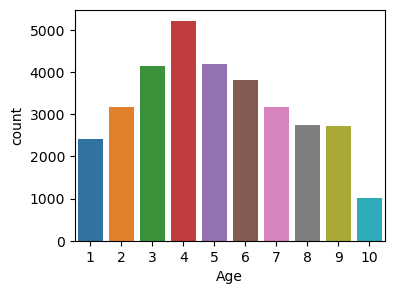

In [32]:
#Let us visualize
plt.figure(figsize=(4,3))
sns.countplot(x=data['Age'])
plt.show()

In [33]:
#So let the numer of people in the age of 30 to 35 are having the maximum counts

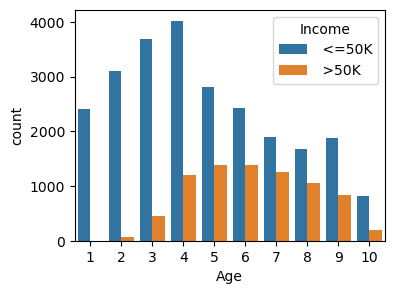

In [34]:
#Relation with the label
plt.figure(figsize=(4,3))
sns.countplot(x=data['Age'],hue=data['Income'])
plt.show()

So here the relation between the age and the salary is pretty good
The young people have very less income over 50k and the old people also have very less income over 50k. This may be because of the fact that the young ones do not have experience and the old ones do not have that much energy left.
The middle age people with a mixture of experience and energy have to highest income over 50k.

In [35]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,7,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,5,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,8,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,3,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,5,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [37]:
#Workclass
data['Workclass'].value_counts()

Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

So here there is a very high class imabalance and we do not want to use it so what we can do here is that we will only
use the private and will combine all the other using 'others'.

In [46]:
data['Workclass'].value_counts().index

Index([' Private', ' Self-emp-not-inc', ' Local-gov', ' ?', ' State-gov',
       ' Self-emp-inc', ' Federal-gov', ' Without-pay', ' Never-worked'],
      dtype='object', name='Workclass')

In [48]:
def workclass(value):
    if value==' Private':
        return 0
    else:
        return 1
data['Workclass'].apply(workclass).value_counts()

Workclass
0    22696
1     9864
Name: count, dtype: int64

In [49]:
data['Workclass']=data['Workclass'].apply(workclass)
data['Workclass'].value_counts()

Workclass
0    22696
1     9864
Name: count, dtype: int64

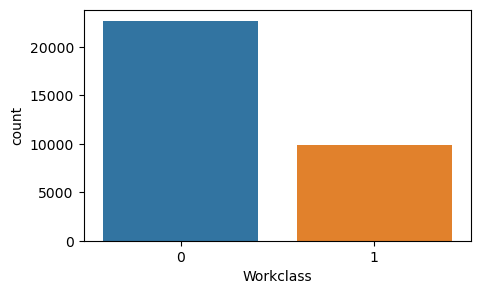

In [50]:
#The visualization part
plt.figure(figsize=(5,3))
sns.countplot(x=data['Workclass'])
plt.show()

Clearly the private workclass which has been represented by 0 is having the highest value counts which means people working in the private organizations are higher in number and moreover the government jobs are less in numbers so people need to go to the private organization this might also be one of the reason for this

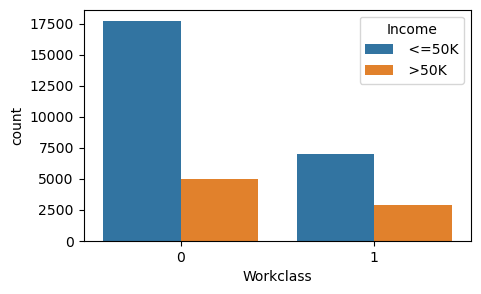

In [51]:
#Relation with the label
plt.figure(figsize=(5,3))
sns.countplot(x=data['Workclass'],hue=data['Income'])
plt.show()

So even if the private workclass is very high as compared to the others but in terms of income over 50k there is not a very big difference between the private and the other workclass which represent the self_employed,gov_job......
So which means that if you are in a private job than the chances of having a salary higher than 50k is less as compared to when you will do your own bussiness or work in a government job.

In [52]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,7,1,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,5,0,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,8,0,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,3,0,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,5,0,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [53]:
#Fnlwgt
data['Fnlwgt'].value_counts()

Fnlwgt
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: count, Length: 21647, dtype: int64

So this is a continous columns so let us see the disribution

<Figure size 500x300 with 0 Axes>

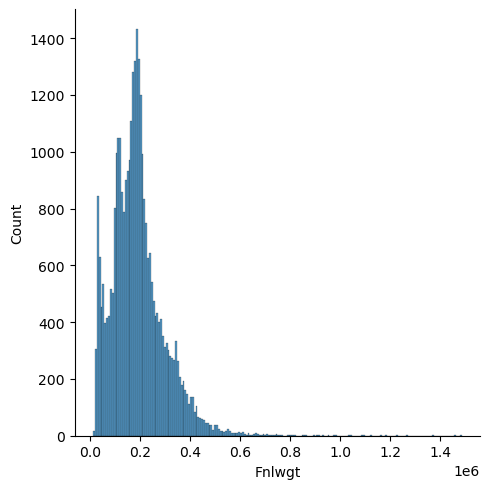

In [55]:
plt.figure(figsize=(5,3))
sns.displot(data['Fnlwgt'])
plt.show()

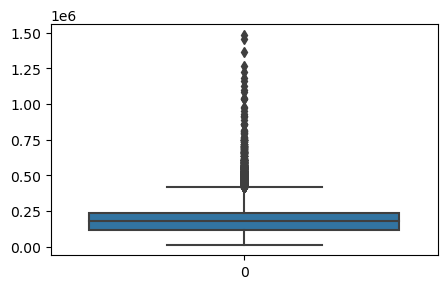

In [56]:
#The data seems to be skewed let us see the box plot to analyse
plt.figure(figsize=(5,3))
sns.boxplot(data['Fnlwgt'])
plt.show()

<Figure size 500x300 with 0 Axes>

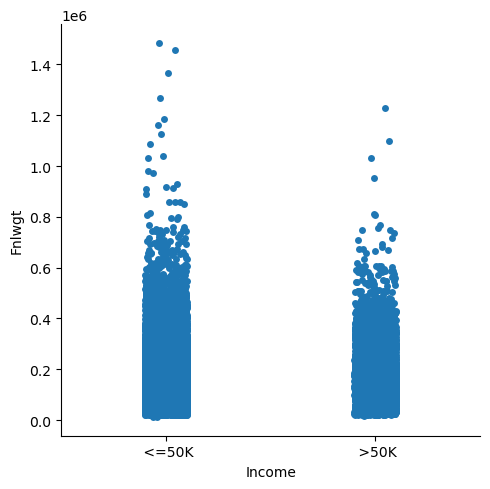

In [57]:
#The data seems to be skewed 
#Let us see the relation with the label
plt.figure(figsize=(5,3))
sns.catplot(x=data['Income'],y=data['Fnlwgt'])
plt.show()

#It seems that the fnlweight is more when the salary is less than 50k

#We will see and treat the outliers later on after the visualization part

In [60]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,7,1,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,5,0,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,8,0,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,3,0,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,5,0,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


The fnlweight was indeed based on various factors which we have seen and we will see how to treat them

In [61]:
#Education
data['Education'].value_counts()

Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64

In [63]:
#This represents the educational classifications of a individual
len(data['Education'].value_counts().index)

16

In [67]:
#There are 16 types of classification and we do not need to use all of them because 16 value count is indeed very
data['Education'].value_counts().sort_values(ascending=False)

Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64

#So some of the qualifications have high value_counts so we will use them as they are but we will classify the value_counts which are less in number.

In [71]:
def education(value):
    if value in [' HS-grad',' Some-college',' Bachelors']:
        return value
    if value in [' Masters', ' Assoc-voc', ' 11th', ' Assoc-acdm', ' 10th']:
        return 'others'
    else:
        return 'others2'

In [74]:
data['Education']=data['Education'].apply(education)
data['Education'].value_counts()

Education
 HS-grad         10501
 Some-college     7291
others            6280
 Bachelors        5354
others2           3134
Name: count, dtype: int64

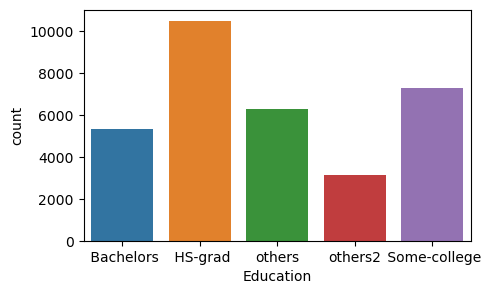

In [76]:
#Visulization
plt.figure(figsize=(5,3))
sns.countplot(x=data['Education'])
plt.show()

The hs_grad is having the highest value couns followed by some_college that means these are the most popular courses

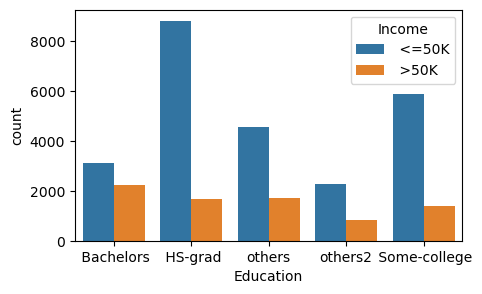

In [77]:
#Relation with the label
plt.figure(figsize=(5,3))
sns.countplot(x=data['Education'],hue=data['Income'])
plt.show()

The employees having a bachelors degree definately are less in numbers but when it comes to having a salary of over 50k they are the highest in number. Infact the students with bachelors degree have almost 50% chances of having a salary over 50k.
That is why it is said that Education is the future.

In [79]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

#Let us labelencode this columns we do not did this earlier because i wanted to see the visualization before encoding it

In [81]:
data['Education']=lab_enc.fit_transform(data['Education'])

In [82]:
data['Education'].value_counts()

Education
1    10501
2     7291
3     6280
0     5354
4     3134
Name: count, dtype: int64

In [78]:
#Education no
data['Education_num'].value_counts()

Education_num
9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: count, dtype: int64

In [83]:
#So this columns can also be grouped together based on the value counts

In [87]:
data['Education_num'].value_counts().sort_values(ascending=False)

Education_num
9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: count, dtype: int64

In [89]:
#Let is group this
def education_num(value):
    if value in [9,10,13]:
        return value
    if value in [14,11,7,12,6]:
        return 'others'
    else:
        return 'others2'

In [90]:
data['Education_num'].apply(education_num).value_counts()

Education_num
9          10501
10          7291
others      6280
13          5354
others2     3134
Name: count, dtype: int64

In [91]:
data['Education_num']=data['Education_num'].apply(education_num)

In [92]:
data['Education_num'].value_counts()

Education_num
9          10501
10          7291
others      6280
13          5354
others2     3134
Name: count, dtype: int64

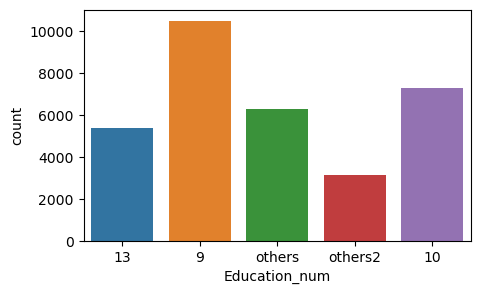

In [93]:
#LEt us visualize this
plt.figure(figsize=(5,3))
sns.countplot(x=data['Education_num'])
plt.show()

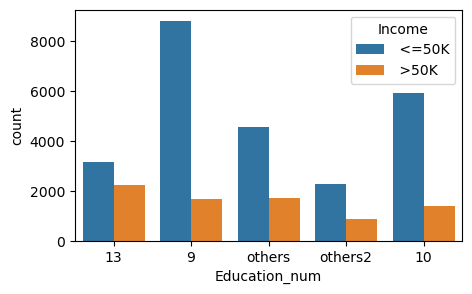

In [94]:
#Relation with the label
plt.figure(figsize=(5,3))
sns.countplot(x=data['Education_num'],hue=data['Income'])
plt.show()

#So i think this columns is same as the education columns but the only difference is that it has numerical data rather than
alphabets. Let us see using the chi2 test whether they are similar or not

In [95]:
from scipy.stats import chi2_contingency

In [96]:
contigency_tabel=pd.crosstab(data['Education'],data['Education_num'])

In [97]:
contigency_tabel

Education_num,9,10,13,others,others2
Education,,,,,
0,0,0,5354,0,0
1,10501,0,0,0,0
2,0,7291,0,0,0
3,0,0,0,6280,0
4,0,0,0,0,3134


In [100]:
#At the first look there seems to be a very high relation now let us see using the chi2
chi2_contingency(contigency_tabel)

Chi2ContingencyResult(statistic=130240.0, pvalue=0.0, dof=16, expected_freq=array([[1726.73077396, 1198.89477887,  880.38439803, 1032.65110565,
         515.33894349],
       [3386.70150491, 2351.43707002, 1726.73077396, 2025.37714988,
        1010.75350123],
       [2351.43707002, 1632.63762285, 1198.89477887, 1406.24938575,
         701.78114251],
       [2025.37714988, 1406.24938575, 1032.65110565, 1211.25307125,
         604.46928747],
       [1010.75350123,  701.78114251,  515.33894349,  604.46928747,
         301.65712531]]))

#We can clearly see that the chi2_statistic as well as the p_value is saying that the relation is very high
We will take the decesion to keep this or remove this later on

In [104]:
data['Education_num']=data['Education_num'].astype('str')

In [105]:
data['Education_num']=lab_enc.fit_transform(data['Education_num'])
data['Education_num'].value_counts()
#Label encoding this column also

Education_num
2    10501
0     7291
3     6280
1     5354
4     3134
Name: count, dtype: int64

In [106]:
#Maritial status
data['Marital_status'].value_counts()

Marital_status
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64

#We can group this column aslo as the separated, widowed, marriage_spouse abscen and the marriage_af_spouse are having a 
less value_counts as compared to the other and using them with low value counts does not makes any sence

In [107]:
data['Marital_status'].value_counts().index

Index([' Married-civ-spouse', ' Never-married', ' Divorced', ' Separated',
       ' Widowed', ' Married-spouse-absent', ' Married-AF-spouse'],
      dtype='object', name='Marital_status')

In [109]:
def marriage_status(value):
    if value in [' Separated',' Widowed', ' Married-spouse-absent', ' Married-AF-spouse']:
        return 'others'
    else:
         return value
data['Marital_status'].apply(marriage_status).value_counts()

Marital_status
 Married-civ-spouse    14976
 Never-married         10682
 Divorced               4443
others                  2459
Name: count, dtype: int64

In [110]:
data['Marital_status']=data['Marital_status'].apply(marriage_status)
data['Marital_status'].value_counts()

Marital_status
 Married-civ-spouse    14976
 Never-married         10682
 Divorced               4443
others                  2459
Name: count, dtype: int64

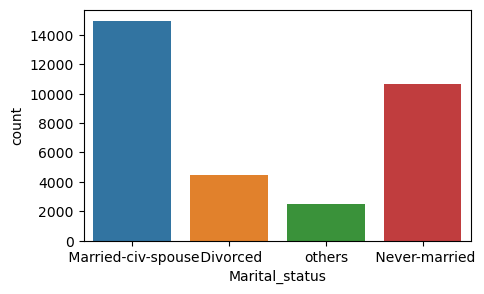

In [111]:
#Visualization part
plt.figure(figsize=(5,3))
sns.countplot(x=data['Marital_status'])
plt.show()

So the married and the never-married are having a high value count
So now let us see their relation with the label

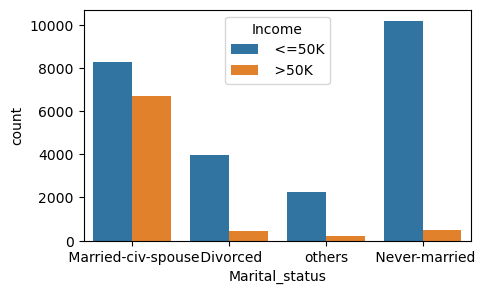

In [112]:
#Relation with the label
plt.figure(figsize=(5,3))
sns.countplot(x=data['Marital_status'],hue=data['Income'])
plt.show()

So the married_civ_spouse have the highest chance of having a high income as compared to the other

SO there must be a relation between the marriage and the age let us see that als

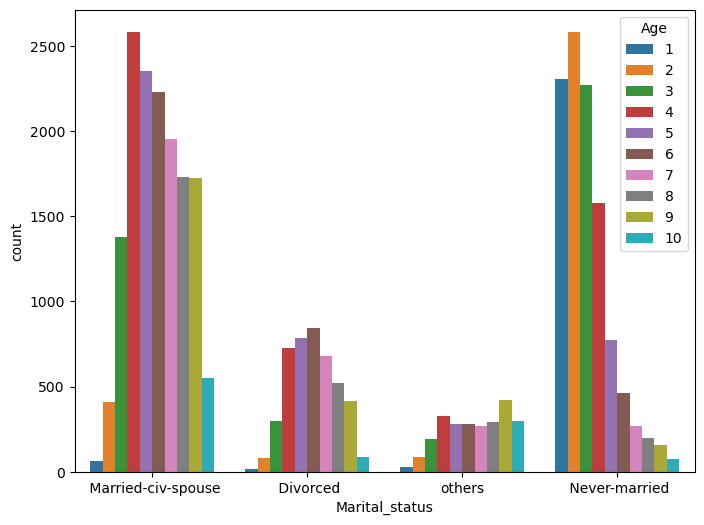

In [115]:
plt.figure(figsize=(8,6))
sns.countplot(x=data['Marital_status'],hue=data['Age'])
plt.show()

So the relation is very clear.The never_married are mostly from the young age group and the married employees mostly from the 
middle age group

In [118]:
#Let us see the chi2 test for this also
contigency_tabel=pd.crosstab(data['Marital_status'],data['Age'])

In [120]:
chi2_contingency(contigency_tabel)

Chi2ContingencyResult(statistic=13623.547017008086, pvalue=0.0, dof=27, expected_freq=array([[ 328.85841523,  431.2002457 ,  565.06335995,  711.48040541,
         572.02260442,  520.71523342,  432.15543612,  373.47945332,
         370.47742629,  137.54742015],
       [1108.48157248, 1453.44471744, 1904.65651106, 2398.18378378,
        1928.11400491, 1755.17248157, 1456.66437346, 1258.88550369,
        1248.76658477,  463.63046683],
       [ 790.6517199 , 1036.70515971, 1358.54305897, 1710.56351351,
        1375.27469287, 1251.91990172, 1039.00165848,  897.93101966,
         890.71345209,  330.6958231 ],
       [ 182.00829238,  238.64987715,  312.73707002,  393.7722973 ,
         316.58869779,  288.19238329,  239.17853194,  206.70402334,
         205.04253686,   76.12628993]]))

So even now the chi2 statistic score is very high but not that high as compated to the education and the education_num

In [121]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,7,1,83311,0,1,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,5,0,215646,1,2,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,8,0,234721,3,3,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,3,0,338409,0,1,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,5,0,284582,3,3,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [122]:
data['Marital_status'].value_counts()

Marital_status
 Married-civ-spouse    14976
 Never-married         10682
 Divorced               4443
others                  2459
Name: count, dtype: int64

In [123]:
#Encoding
data['Marital_status']=lab_enc.fit_transform(data['Marital_status'])
data['Marital_status'].value_counts()

Marital_status
1    14976
2    10682
0     4443
3     2459
Name: count, dtype: int64

#Occupation
Regardless of the age,gender,marriage status or anything this has to be the most important aspect when it comes to the salary of an employee.

In [124]:
data['Occupation'].value_counts()

Occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: count, dtype: int64

In [125]:
#Very high imbalance so we need to group them 
data['Occupation'].value_counts().index

Index([' Prof-specialty', ' Craft-repair', ' Exec-managerial', ' Adm-clerical',
       ' Sales', ' Other-service', ' Machine-op-inspct', ' ?',
       ' Transport-moving', ' Handlers-cleaners', ' Farming-fishing',
       ' Tech-support', ' Protective-serv', ' Priv-house-serv',
       ' Armed-Forces'],
      dtype='object', name='Occupation')

In [132]:
def occupation(value):
    if value in [' Prof-specialty', ' Craft-repair', ' Exec-managerial', ' Adm-clerical',' Sales']:
        return value
    if value in [' Machine-op-inspct', ' ?',' Transport-moving',' Handlers-cleaners']:
        return 'other'
    else:
        return 'others2'

In [133]:
data['Occupation'].apply(occupation).value_counts()

Occupation
other               6812
others2             6024
 Prof-specialty     4140
 Craft-repair       4099
 Exec-managerial    4066
 Adm-clerical       3769
 Sales              3650
Name: count, dtype: int64

So what we have done here is that we have used the higher value counts as it is and we have grouped the lesses value counts groups together. And apart from that we have grouped the other_service columns which was earlier in the columns with the prpfessions which had very less value counts.

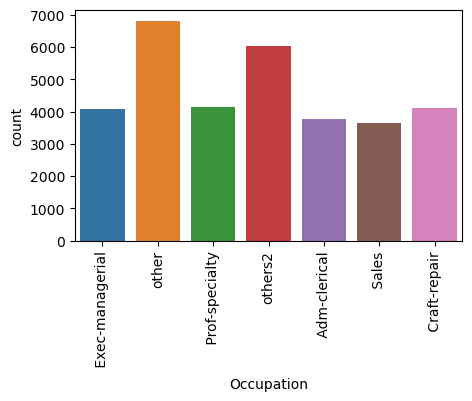

In [136]:
#data['Occupation']=data['Occupation'].apply(occupation)
#Visualization
plt.figure(figsize=(5,3))
sns.countplot(x=data['Occupation'])
plt.xticks(rotation=90)
plt.show()

#SO the others and the others2 have the highest value counts among the groups

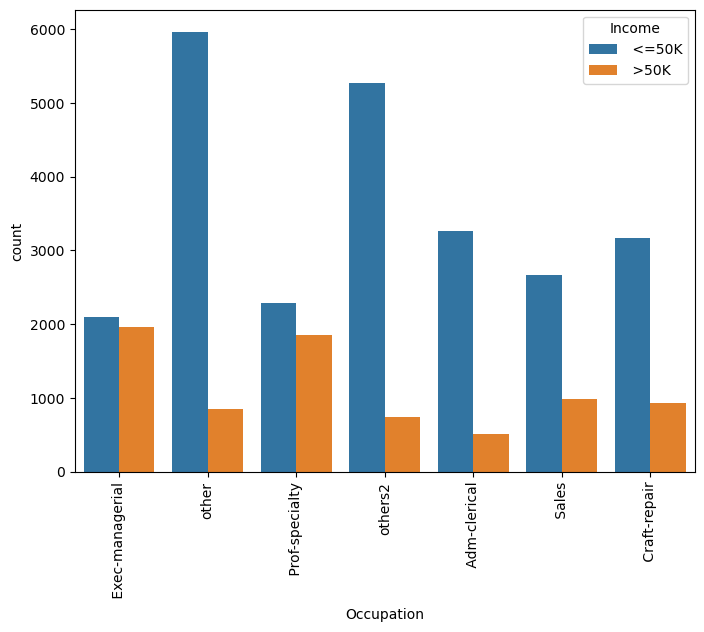

In [137]:
plt.figure(figsize=(8,6))
sns.countplot(x=data['Occupation'],hue=data['Income'])
plt.xticks(rotation=90)
plt.show()

So the occupation is the most important thing when it comes to the income of a employee. So here also it can be seen very clearly that the exec_managerical, prof_specialty.... have the highest ratio of the employees having a salary greater than 50K.
On other hand the other and the other2 which had the highest number of employees but when it comes to the salary than they are very less in number. Infact When we will add the employees of other and other2 who have a salary greater than 50K even than the number will be less than the employees of the prof_speciality who have a salary of more than 50K. So the occupatin has a very big impact on the salary.

In [139]:
#labelencoding
data['Occupation']=lab_enc.fit_transform(data['Occupation'])
data['Occupation'].value_counts()

Occupation
5    6812
6    6024
3    4140
1    4099
2    4066
0    3769
4    3650
Name: count, dtype: int64

In [140]:
#Label Encoding done
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,7,1,83311,0,1,1,2,Husband,White,Male,0,0,13,United-States,<=50K
1,5,0,215646,1,2,0,5,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,8,0,234721,3,3,1,5,Husband,Black,Male,0,0,40,United-States,<=50K
3,3,0,338409,0,1,1,3,Wife,Black,Female,0,0,40,Cuba,<=50K
4,5,0,284582,3,3,1,2,Wife,White,Female,0,0,40,United-States,<=50K


In [141]:
#Relationship
data['Relationship'].value_counts()

Relationship
 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: count, dtype: int64

In [143]:
#So here also there are some imbalance we can group them
data['Relationship'].value_counts().index

Index([' Husband', ' Not-in-family', ' Own-child', ' Unmarried', ' Wife',
       ' Other-relative'],
      dtype='object', name='Relationship')

In [144]:
def relation(value):
    if value in [' Husband', ' Not-in-family', ' Own-child']:
        return value
    else:
        return 'other'
data['Relationship'].apply(relation).value_counts()

Relationship
 Husband          13193
 Not-in-family     8304
other              5995
 Own-child         5068
Name: count, dtype: int64

In [145]:
#Now the relationship columns seems to be fine and balanced
data['Relationship']=data['Relationship'].apply(relation)
data['Relationship'].value_counts()

Relationship
 Husband          13193
 Not-in-family     8304
other              5995
 Own-child         5068
Name: count, dtype: int64

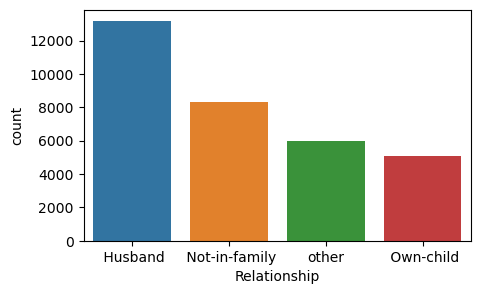

In [146]:
#Visualization part
plt.figure(figsize=(5,3))
sns.countplot(x=data['Relationship'])
plt.show()

So the husbands are largers in numbers as employees. And this is not so shocking because in most of the families the husbands go out and earn money and the wifes take care of the family.

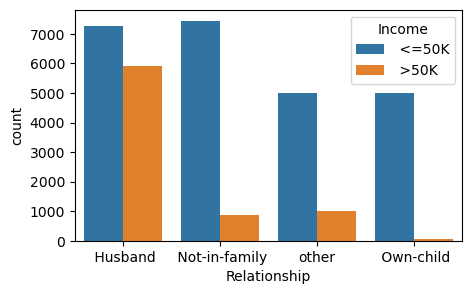

In [147]:
#Relation with the label
plt.figure(figsize=(5,3))
sns.countplot(x=data['Relationship'],hue=data['Income'])
plt.show()

So here the husbands have the highest chance and highest ratio of having a income of greater than 50k as compared to the others
Let us see the relation of the relationship with the age

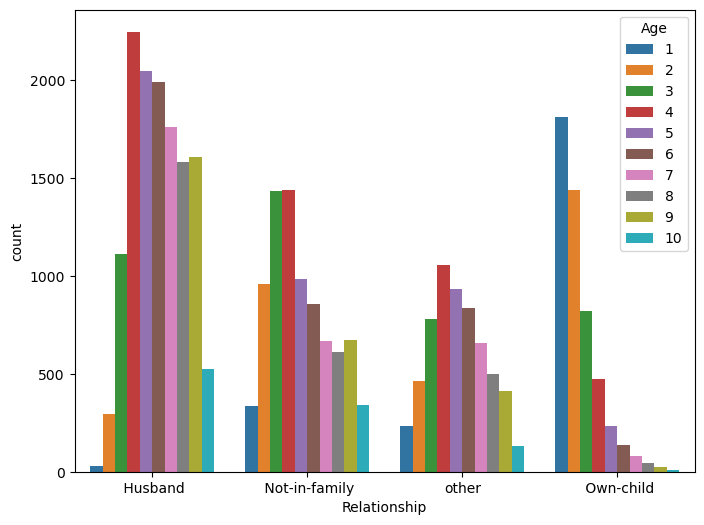

In [149]:
plt.figure(figsize=(8,6))
sns.countplot(x=data['Relationship'],hue=data['Age'])
plt.show()

There is a clear relation between the age and the relationship. The husbands are more in the middle age and the own-child is more in the young age.

In [151]:
data['Relationship']=lab_enc.fit_transform(data['Relationship'])
data['Relationship'].value_counts()

Relationship
0    13193
1     8304
3     5995
2     5068
Name: count, dtype: int64

In [152]:
#Race column
data['Race'].value_counts()

Race
 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: count, dtype: int64

In [153]:
data['Race'].value_counts().index

Index([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'],
      dtype='object', name='Race')

In [155]:
#There is a very big imbalance here also so let us just adjust it accordingly
def race(value):
    if value in [' White', ' Black']:
        return value
    else:
        return 'other'
data['Race'].apply(race).value_counts()

Race
 White    27815
 Black     3124
other      1621
Name: count, dtype: int64

In [156]:
data['Race']=data['Race'].apply(race)

So what we have done here is that we have categorized and grouped the races with lower value counts together.

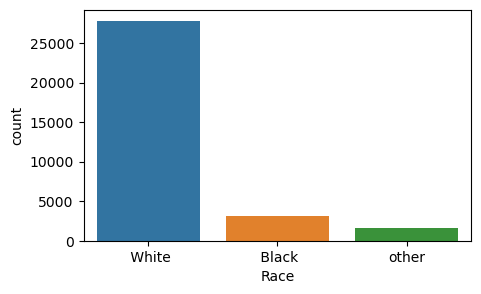

In [157]:
#Visualization part
plt.figure(figsize=(5,3))
sns.countplot(x=data['Race'])
plt.show()

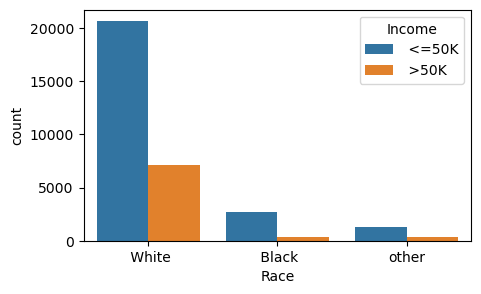

In [158]:
#CLearly the value_counts of white is very very high .
#We will now see the relatin with the label
plt.figure(figsize=(5,3))
sns.countplot(x=data['Race'],hue=data['Income'])
plt.show()

#The white race people who are having the highest number of employees also have the highest ratio when it comes to having a salary of greater than or less than 50k.

In [160]:
#Label Encoding
data['Race']=lab_enc.fit_transform(data['Race'])
data['Race'].value_counts()

Race
1    27815
0     3124
2     1621
Name: count, dtype: int64

In [162]:
#Sex
data['Sex'].value_counts()

Sex
 Male      21789
 Female    10771
Name: count, dtype: int64

#The male have a higher value counts and this time we can not do anything like grouping the classes together because here there 
is only one class.

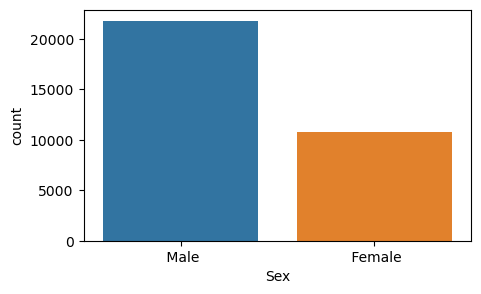

In [163]:
#Visualization
plt.figure(figsize=(5,3))
sns.countplot(x=data['Sex'])
plt.show()

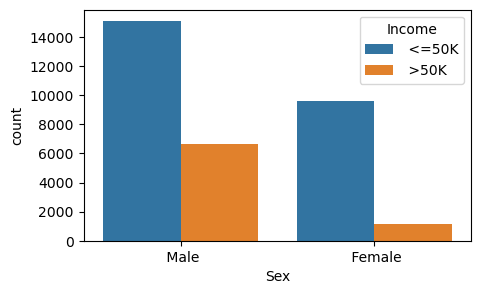

In [164]:
plt.figure(figsize=(5,3))
sns.countplot(x=data['Sex'],hue=data['Income'])
plt.show()

The females employees have very less ratio of the  employees who have salary greater than 50k vs the emlpoyee who have salary of less than 50k. Which means most of the female employees have salary of less than 50k. But on the other hand the male employees have very high ratio of this which means men are more in numbers when it comes to having a salary of greater than 50k.

In [167]:
data['Sex']=lab_enc.fit_transform(data['Sex']) #Label Encoding of the sex column

In [168]:
data['Sex'].value_counts()

Sex
1    21789
0    10771
Name: count, dtype: int64

In [169]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,7,1,83311,0,1,1,2,0,1,1,0,0,13,United-States,<=50K
1,5,0,215646,1,2,0,5,1,1,1,0,0,40,United-States,<=50K
2,8,0,234721,3,3,1,5,0,0,1,0,0,40,United-States,<=50K
3,3,0,338409,0,1,1,3,3,0,0,0,0,40,Cuba,<=50K
4,5,0,284582,3,3,1,2,3,1,0,0,0,40,United-States,<=50K


In [170]:
#Native country
data['Native_country'].value_counts()

Native_country
 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
                               ...  
 Outlying-US(Guam-USVI-etc)       14
 Honduras                         13
 Hungary                          13
 Scotland                         12
 Holand-Netherlands                1
Name: count, Length: 42, dtype: int64

In [171]:
pd.set_option('display.max_rows',None) #TO see all the rows in value counts

In [172]:
data['Native_country'].value_counts()

Native_country
 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                  

So out of 32500 rows the 29500 rows belong to united states 
So this is a very imbalanced column
So what we will do it we will group all the countries except united states together
So let us proceed

In [176]:
data['Native_country'].value_counts().index

Index([' United-States', ' Mexico', ' ?', ' Philippines', ' Germany',
       ' Canada', ' Puerto-Rico', ' El-Salvador', ' India', ' Cuba',
       ' England', ' Jamaica', ' South', ' China', ' Italy',
       ' Dominican-Republic', ' Vietnam', ' Guatemala', ' Japan', ' Poland',
       ' Columbia', ' Taiwan', ' Haiti', ' Iran', ' Portugal', ' Nicaragua',
       ' Peru', ' France', ' Greece', ' Ecuador', ' Ireland', ' Hong',
       ' Cambodia', ' Trinadad&Tobago', ' Laos', ' Thailand', ' Yugoslavia',
       ' Outlying-US(Guam-USVI-etc)', ' Honduras', ' Hungary', ' Scotland',
       ' Holand-Netherlands'],
      dtype='object', name='Native_country')

In [179]:
def native_country(value):
    if value==' United-States':
        return value
    else:
        return 'Other'
data['Native_country'].apply(native_country).value_counts()

Native_country
 United-States    29169
Other              3391
Name: count, dtype: int64

In [182]:
data['Native_country']=data['Native_country'].apply(native_country)
data['Native_country'].value_counts()

Native_country
 United-States    29169
Other              3391
Name: count, dtype: int64

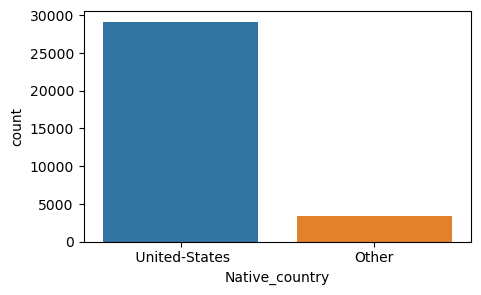

In [183]:
#Visualization
plt.figure(figsize=(5,3))
sns.countplot(x=data['Native_country'])
plt.show()

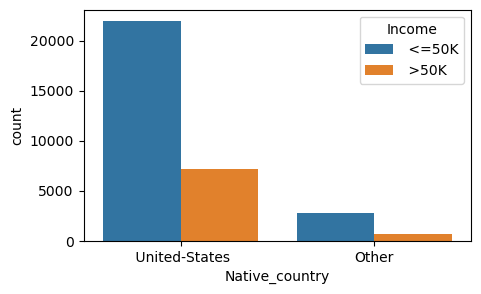

In [184]:
#United-states very large in numbers
plt.figure(figsize=(5,3))
sns.countplot(x=data['Native_country'],hue=data['Income'])
plt.show()

A united states employee has more chance of having a income greater than 50K as compared to the employees of other country

In [185]:
data['Native_country']=lab_enc.fit_transform(data['Native_country'])
data['Native_country'].value_counts()

Native_country
0    29169
1     3391
Name: count, dtype: int64

In [186]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,7,1,83311,0,1,1,2,0,1,1,0,0,13,0,<=50K
1,5,0,215646,1,2,0,5,1,1,1,0,0,40,0,<=50K
2,8,0,234721,3,3,1,5,0,0,1,0,0,40,0,<=50K
3,3,0,338409,0,1,1,3,3,0,0,0,0,40,1,<=50K
4,5,0,284582,3,3,1,2,3,1,0,0,0,40,0,<=50K


In [187]:
#Capital_gain
data['Capital_gain'].value_counts()

Capital_gain
0        29849
15024      347
7688       284
7298       246
99999      159
5178        97
3103        97
4386        70
5013        69
8614        55
3325        53
2174        47
10520       43
4064        42
14084       41
4650        41
3137        37
20051       37
27828       34
594         34
3908        32
2829        31
13550       27
6849        27
14344       26
1055        25
2885        24
3411        24
2176        23
4787        23
3464        23
9386        22
2597        20
4101        20
2407        19
4865        17
2202        16
1506        15
3942        14
3674        14
4416        12
2580        12
4508        12
3781        12
10605       12
2463        11
2907        11
5455        11
2354        11
2635        11
25236       11
6497        11
7430         9
2105         9
6418         9
2964         9
2977         8
1151         8
2414         8
3471         8
914          8
4934         7
1831         7
1409         7
1471         7
3818        

In [190]:
#Here also we can group the columns together as there is a very large imbalance
data['Capital_gain'].value_counts().index

Index([    0, 15024,  7688,  7298, 99999,  5178,  3103,  4386,  5013,  8614,
       ...
        7978,  2387,  1639,  1455,  6097,  1111,  2538, 22040,  4931,  5060],
      dtype='int64', name='Capital_gain', length=119)

In [198]:
def capital_gain(value):
    if value==0:
        return value
    else:
        return 'Something'

In [195]:
pd.set_option('display.max_rows',20)

In [196]:
data['Capital_gain'].apply(capital_gain)

KeyboardInterrupt: 

In [200]:
data['Capital_gain'].apply(capital_gain).value_counts()

Capital_gain
0            29849
Something     2711
Name: count, dtype: int64

In [201]:
data['Capital_gain']=data['Capital_gain'].apply(capital_gain)
data['Capital_gain'].value_counts()

Capital_gain
0            29849
Something     2711
Name: count, dtype: int64

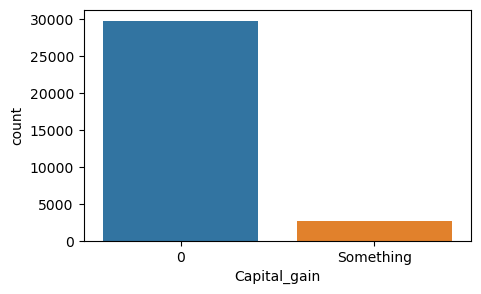

In [202]:
#Visualization
plt.figure(figsize=(5,3))
sns.countplot(x=data['Capital_gain'])
plt.show()

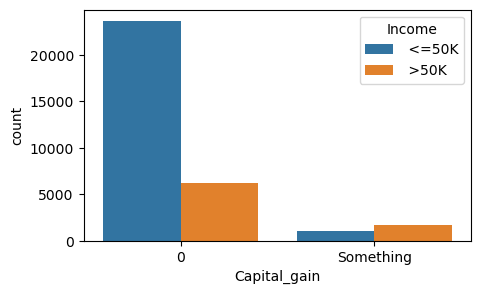

In [203]:
plt.figure(figsize=(5,3))
sns.countplot(x=data['Capital_gain'],hue=data['Income'])
plt.show()

In [205]:
data['Capital_gain']=data['Capital_gain'].astype('str')

Employees with some capital gain have more chances of having an income of over 50K

In [206]:
data['Capital_gain']=lab_enc.fit_transform(data['Capital_gain'])
data['Capital_gain'].value_counts()

Capital_gain
0    29849
1     2711
Name: count, dtype: int64

In [207]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,7,1,83311,0,1,1,2,0,1,1,0,0,13,0,<=50K
1,5,0,215646,1,2,0,5,1,1,1,0,0,40,0,<=50K
2,8,0,234721,3,3,1,5,0,0,1,0,0,40,0,<=50K
3,3,0,338409,0,1,1,3,3,0,0,0,0,40,1,<=50K
4,5,0,284582,3,3,1,2,3,1,0,0,0,40,0,<=50K


In [208]:
#Capital loss
data['Capital_loss'].value_counts()

Capital_loss
0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: count, Length: 92, dtype: int64

In [209]:
pd.set_option('display.max_rows',None)

In [210]:
data['Capital_loss'].value_counts()

Capital_loss
0       31041
1902      202
1977      168
1887      159
1848       51
1485       51
2415       49
1602       47
1740       42
1590       40
1876       39
1672       34
1564       25
2258       25
2001       24
1669       24
1741       24
1980       23
1719       22
2051       21
2002       21
1408       21
1579       20
2377       20
1504       18
1721       18
1974       18
2339       17
2179       15
1628       15
1762       14
2559       12
625        12
2444       12
2824       10
1617        9
2042        9
2205        9
2392        9
1651        9
1594        8
2174        7
1380        7
1340        7
1092        7
2206        6
2057        6
880         6
1573        6
2246        6
2603        5
213         4
1825        4
1668        4
1258        4
2547        4
1726        4
2129        3
419         3
2231        3
2267        3
2457        3
323         3
653         3
4356        3
3770        2
1755        2
3683        2
1648        2
2754        2
3900   

In [211]:
#Same thing here also most have 0 values
def capital_loss(value):
    if value==0:
        return value
    else:
        return 'Something'

In [212]:
pd.set_option('display.max_rows',20)

In [214]:
data['Capital_loss'].apply(capital_loss).value_counts()

Capital_loss
0            31041
Something     1519
Name: count, dtype: int64

In [216]:
data['Capital_loss']=data['Capital_loss'].apply(capital_loss)

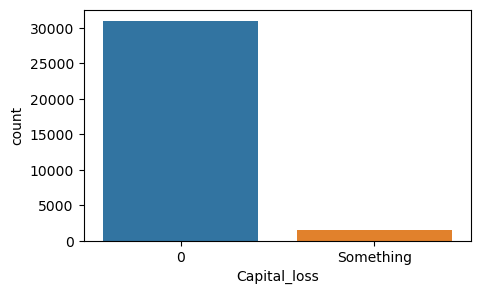

In [217]:
#Visualization
plt.figure(figsize=(5,3))
sns.countplot(x=data['Capital_loss'])
plt.show()

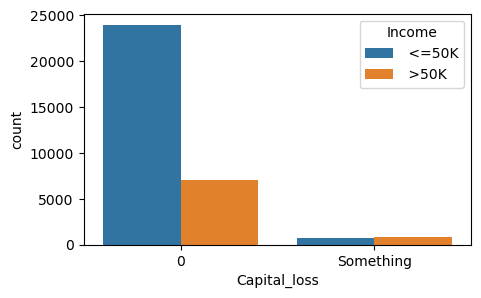

In [218]:
#Most of the rows have values 0
plt.figure(figsize=(5,3))
sns.countplot(x=data['Capital_loss'],hue=data['Income'])
plt.show()

People with 0 capital loss have more chances of having a income greater than 50k

In [220]:
data['Capital_loss']=data['Capital_loss'].astype('str')

In [221]:
data['Capital_loss']=lab_enc.fit_transform(data['Capital_loss'])
data['Capital_loss'].value_counts()

Capital_loss
0    31041
1     1519
Name: count, dtype: int64

In [222]:
#Hours per week
data['Hours_per_week'].value_counts()

Hours_per_week
40    15216
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
94        1
92        1
74        1
87        1
Name: count, Length: 94, dtype: int64

In [223]:
pd.set_option('display.max_rows',None)

In [224]:
data['Hours_per_week'].value_counts()

Hours_per_week
40    15216
50     2819
45     1824
60     1475
35     1297
20     1224
30     1149
55      694
25      674
48      517
38      476
15      404
70      291
10      278
32      266
24      252
65      244
36      220
42      219
44      212
16      205
12      173
43      151
37      149
8       145
52      138
80      133
56       97
28       86
99       85
46       82
18       75
72       71
75       66
6        64
5        60
4        54
47       49
84       45
22       44
54       41
3        39
33       39
39       38
41       36
14       34
2        32
27       30
26       30
49       29
17       29
90       29
34       28
58       28
7        26
53       25
21       24
13       23
23       21
1        20
62       18
9        18
57       17
66       17
19       14
64       14
85       13
51       13
68       12
11       11
98       11
63       10
78        8
29        7
77        6
31        5
59        5
96        5
67        4
76        3
81        3
91        3
6

In [226]:
index=data['Hours_per_week'].value_counts().index

In [227]:
index

Index([40, 50, 45, 60, 35, 20, 30, 55, 25, 48, 38, 15, 70, 10, 32, 24, 65, 36,
       42, 44, 16, 12, 43, 37,  8, 52, 80, 56, 28, 99, 46, 18, 72, 75,  6,  5,
        4, 47, 84, 22, 54,  3, 33, 39, 41, 14,  2, 27, 26, 49, 17, 90, 34, 58,
        7, 53, 21, 13, 23,  1, 62,  9, 57, 66, 19, 64, 85, 51, 68, 11, 98, 63,
       78, 29, 77, 31, 59, 96, 67, 76, 81, 91, 61, 86, 95, 97, 89, 73, 88, 82,
       94, 92, 74, 87],
      dtype='int64', name='Hours_per_week')

In [ ]:
#This column is also discrete and we should group this column also and we will do this

In [229]:
data['Hours_per_week'].value_counts().sort_index()

Hours_per_week
1        20
2        32
3        39
4        54
5        60
6        64
7        26
8       145
9        18
10      278
11       11
12      173
13       23
14       34
15      404
16      205
17       29
18       75
19       14
20     1224
21       24
22       44
23       21
24      252
25      674
26       30
27       30
28       86
29        7
30     1149
31        5
32      266
33       39
34       28
35     1297
36      220
37      149
38      476
39       38
40    15216
41       36
42      219
43      151
44      212
45     1824
46       82
47       49
48      517
49       29
50     2819
51       13
52      138
53       25
54       41
55      694
56       97
57       17
58       28
59        5
60     1475
61        2
62       18
63       10
64       14
65      244
66       17
67        4
68       12
70      291
72       71
73        2
74        1
75       66
76        3
77        6
78        8
80      133
81        3
82        1
84       45
85       13
86        2
8

There is a very high randomness in the value counts so it will not be a wise idea to group them because there is no trend here i this columns. So we will use this columns as it is

In [230]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,7,1,83311,0,1,1,2,0,1,1,0,0,13,0,<=50K
1,5,0,215646,1,2,0,5,1,1,1,0,0,40,0,<=50K
2,8,0,234721,3,3,1,5,0,0,1,0,0,40,0,<=50K
3,3,0,338409,0,1,1,3,3,0,0,0,0,40,1,<=50K
4,5,0,284582,3,3,1,2,3,1,0,0,0,40,0,<=50K


In [231]:
#The label
data['Income'].value_counts()

Income
 <=50K    24719
 >50K      7841
Name: count, dtype: int64

#So there is a clear imbalance in the dataset. We will first make the model using this only if  it will not give a good accuracy than we can proceed towards the balancing of the label

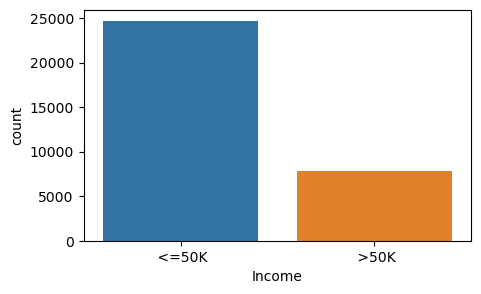

In [232]:
#Visualization
plt.figure(figsize=(5,3))
sns.countplot(x=data['Income'])
plt.show()

In [233]:
#Let us label encode the columns after that we can proceed to the model building
data['Income']=lab_enc.fit_transform(data['Income'])

In [234]:
data['Income'].value_counts()

Income
0    24719
1     7841
Name: count, dtype: int64

In [235]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,7,1,83311,0,1,1,2,0,1,1,0,0,13,0,0
1,5,0,215646,1,2,0,5,1,1,1,0,0,40,0,0
2,8,0,234721,3,3,1,5,0,0,1,0,0,40,0,0
3,3,0,338409,0,1,1,3,3,0,0,0,0,40,1,0
4,5,0,284582,3,3,1,2,3,1,0,0,0,40,0,0


<Figure size 500x300 with 0 Axes>

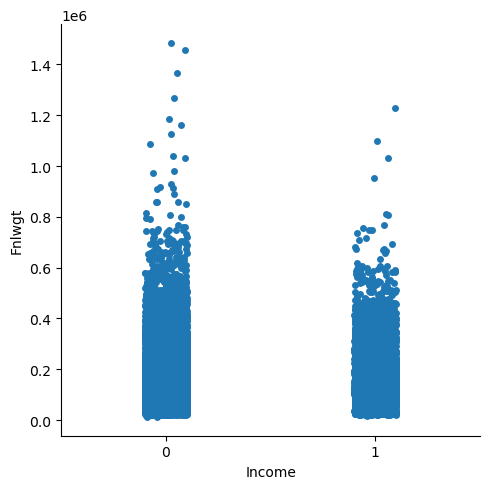

In [236]:
#There is only one continous column in our dataset which is he fnlwgt let us see and treat this
plt.figure(figsize=(5,3))
sns.catplot(x=data['Income'],y=data['Fnlwgt'])
plt.show()

<Figure size 500x300 with 0 Axes>

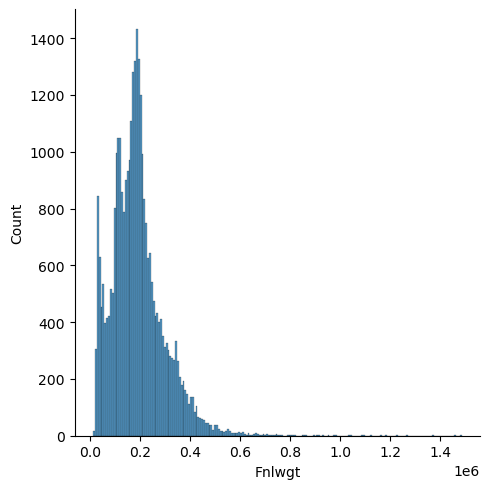

In [237]:
#Distribution of the columns
plt.figure(figsize=(5,3))
sns.displot(data['Fnlwgt'])
plt.show()

In [238]:
#Let us see the zscore and see if there is any outlier or not because zscore can help to treat the outliers
from scipy.stats import zscore

In [239]:
Zscore=np.abs(zscore(data['Fnlwgt']))

In [241]:
pd.set_option('display.max_rows',15)

In [242]:
Zscore

0        1.008742
1        0.245046
2        0.425770
3        1.408146
4        0.898170
           ...   
32555    0.639710
32556    0.335466
32557    0.358811
32558    0.110927
32559    0.929862
Name: Fnlwgt, Length: 32560, dtype: float64

In [257]:
index=np.where(Zscore>3) #The index where the zscore was greater than 3

In [259]:
len(index[0])

347

In [ ]:
#Let uss see how much data we will loose if we delete this

In [267]:
shape=data.shape[0]

In [268]:
print((len(index[0])/shape)*100)

1.0657248157248156


In [269]:
#SO this is only 1% so we can delete this for sure

In [272]:
data=data.drop(index=index[0])

In [274]:
data.reset_index(inplace=True)

In [276]:
data=data.drop(columns='index')

In [277]:
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,7,1,83311,0,1,1,2,0,1,1,0,0,13,0,0
1,5,0,215646,1,2,0,5,1,1,1,0,0,40,0,0
2,8,0,234721,3,3,1,5,0,0,1,0,0,40,0,0
3,3,0,338409,0,1,1,3,3,0,0,0,0,40,1,0
4,5,0,284582,3,3,1,2,3,1,0,0,0,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32208,3,0,257302,3,3,1,6,3,1,0,0,0,38,0,0
32209,5,0,154374,1,2,1,5,0,1,1,0,0,40,0,1
32210,9,0,151910,1,2,3,0,3,1,0,0,0,40,0,0
32211,2,0,201490,1,2,2,0,2,1,1,0,0,20,0,0


In [278]:
#So succesfully deleted the outliers also
ZScore=np.abs(zscore(data['Fnlwgt']))

In [288]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,7,1,83311,0,1,1,2,0,1,1,0,0,13,0,0
1,5,0,215646,1,2,0,5,1,1,1,0,0,40,0,0
2,8,0,234721,3,3,1,5,0,0,1,0,0,40,0,0
3,3,0,338409,0,1,1,3,3,0,0,0,0,40,1,0
4,5,0,284582,3,3,1,2,3,1,0,0,0,40,0,0


In [290]:
data['Education'].value_counts()

Education
1    10387
2     7217
3     6225
0     5291
4     3093
Name: count, dtype: int64

In [291]:
data['Education_num'].value_counts()

Education_num
2    10387
0     7217
3     6225
1     5291
4     3093
Name: count, dtype: int64

In [292]:
#There two are the same columns so we will drop one of them 
#We will drop the education num column
data=data.drop(columns='Education_num')

In [293]:
data.head()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,7,1,83311,0,1,2,0,1,1,0,0,13,0,0
1,5,0,215646,1,0,5,1,1,1,0,0,40,0,0
2,8,0,234721,3,1,5,0,0,1,0,0,40,0,0
3,3,0,338409,0,1,3,3,0,0,0,0,40,1,0
4,5,0,284582,3,1,2,3,1,0,0,0,40,0,0


In [294]:
data

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,7,1,83311,0,1,2,0,1,1,0,0,13,0,0
1,5,0,215646,1,0,5,1,1,1,0,0,40,0,0
2,8,0,234721,3,1,5,0,0,1,0,0,40,0,0
3,3,0,338409,0,1,3,3,0,0,0,0,40,1,0
4,5,0,284582,3,1,2,3,1,0,0,0,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32208,3,0,257302,3,1,6,3,1,0,0,0,38,0,0
32209,5,0,154374,1,1,5,0,1,1,0,0,40,0,1
32210,9,0,151910,1,3,0,3,1,0,0,0,40,0,0
32211,2,0,201490,1,2,0,2,1,1,0,0,20,0,0


All the columns except the fnlwgt are categorical so no need to check the correlation or the covariance or the variance inflation factor or anything as such. 
So we will proceed to the model   building.

#One thing to be noted here is that i have encoded using the label encoder because this is a classification task and in this the 
tree based models work the best most times and they do not have any issue with the ordinal relation the label encoder does in the columns. So we will use the label encocoder if it gives a good result than good otherwise we can use the one hot encoder also.

#We have to standardize the fnlweight column as this is the only columns with continous attributes 
The categorical attributes do not need any standardization.

In [295]:
from sklearn.preprocessing import StandardScaler

In [296]:
data_copy=data.copy()

In [301]:
data['Fnlwgt']=StandardScaler().fit_transform(data[['Fnlwgt']])

In [303]:
x=data.drop(columns='Income')
y=data['Income']

In [306]:
#now let us import the libraries to make our model
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report

In [309]:
# we will use the logisticregression to check the best random state
maxACC=0
maxrs=0
for i in range(1,200):
    lr=LogisticRegression()
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.8017134343183512 68


In [310]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=maxrs)

In [311]:
rfc=RandomForestClassifier()
et=ExtraTreesClassifier()
lg=LogisticRegression()
sv=SVC()
dc=DecisionTreeClassifier()
gbdt=GradientBoostingClassifier()
abc=AdaBoostClassifier()
bc=BaggingClassifier()
knn=KNeighborsClassifier()

In [312]:
models=[rfc,et,lg,sv,dc,gbdt,abc,bc]

We know that the logistic regression did not had a good accuracy but nothing to worry because we tested it on logictic regressio  just to get the  besr random state and nothing more than that. The  linear models are very higly effected by the ordinal relation of the columns so that is why there is no worry here. The tree based model will surely give us a good accuracy for sure.

In [313]:
for i in models:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(i,'  ', accuracy_score(y_test,pred))

RandomForestClassifier()    0.8253041966724609
ExtraTreesClassifier()    0.813508815495406
LogisticRegression()    0.8017134343183512
SVC()    0.7736528433076733
DecisionTreeClassifier()    0.7809783958281599
GradientBoostingClassifier()    0.8452942637198907
AdaBoostClassifier()    0.8375962254780234
BaggingClassifier()    0.8194685870374969


In [314]:
#Let us see what happens after cross validation
from sklearn.model_selection import cross_val_score
for i in models:
    print(i, '  ',cross_val_score(i,x,y,cv=5).mean())

RandomForestClassifier()    0.8237979525081384
ExtraTreesClassifier()    0.8122497320013494
LogisticRegression()    0.7915436842739544
SVC()    0.7735386225242801
DecisionTreeClassifier()    0.7769222888961607
GradientBoostingClassifier()    0.8410271420822426
AdaBoostClassifier()    0.8343527987385668
BaggingClassifier()    0.81386397363299


The gradient boost has the best accuracy so let us do the tuning for this now

In [321]:
#Gradient boosting
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [ 5,7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 4],
    'subsample': [0.8, 0.9]
}
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x,y)
print(grid_search.best_params_)

{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}


In [322]:
model=GradientBoostingClassifier(learning_rate=0.1,max_depth=5,min_samples_leaf=2,
                                min_samples_split=2,n_estimators=100,subsample=0.8)

In [323]:
model.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=5, min_samples_leaf=2, subsample=0.8)

In [324]:
pred=model.predict(x_test)

In [325]:
accuracy_score(y_test,pred)

0.8426868636702259

In [326]:
import joblib
joblib.dump(model,'model.PKL')

['model.PKL']

So the gradient boost has been the best model with an accuracy score of 0.842

In [328]:
accuracy_score(y_train,model.predict(x_train))

0.8581894945982863

#No overfitting in the model also

Conclusions-
1.-There were 15 columns in the dataset and two columns the education and the education no were exactly the same that is why
   what we did is we deleted the education no from the dataset. And apart from this there is no other column with
   multicollinearity issues. So rest all the column were as it is
2.-All the models were having an accuracy in a similar range at first.The randomforest, gradientboost and the adaboost were the 
   best models with the best accuracy among all. The gradient boost had the highest accuracy of 0.85
3.-After that we did the tuning of the gradientboost models as it had the best accuaracy and after the tuning it had a accuracy
   of 0.85 and the train accuracy was also moreover the same. So this model is also not overfitted and can be generalized as
   well

In [5]:
print('*'*100)
print('                                         THANKS')
print('*'*100)

****************************************************************************************************
                                         THANKS
****************************************************************************************************
